# Статистический анализ и прогнозирование рынка ценных бумаг в России

## 1. Технический анализ

In [9]:
# Модули для обработки данных
import numpy as np
import pandas as pd
from datetime import date
# Модули для визуализации временных рядов
import plotly.graph_objects as go
import plotly.express as px
# Модули для анализа цен на акции
from finam import Timeframe  # Выгрузка данных с finam.ru
from data_preprocessing import Data  # Предварительная обработка данных

In [22]:
# Настройка отображения табличных данных
pd.options.display.max_rows = 10
pd.options.display.precision = 2

### Moving Average Convergence/Divergence

Индикатор используется для проверки силы и направления тренда, а также для определения разворотных точек. Строится на основе скользящих средних.

In [25]:
# Газпром, дневной график, с 01.01.2013.
gazp_daily = Data('GAZP', timeframe=Timeframe.DAILY,
                  start_date=date(2013, 1, 1), end_date=date(2019, 1, 1)
                  ).download()
gazp_daily

,open,high,low,close,volume
date,,,,,
2013-01-08,146.20,147.96,145.64,147.90,25194460
2013-01-09,147.27,149.05,147.15,148.91,29495030
2013-01-10,149.00,149.51,147.30,147.60,22687230
2013-01-11,147.70,148.69,147.40,147.97,19645680
2013-01-14,148.55,149.85,148.20,149.60,28624470
...,...,...,...,...,...
2018-12-25,148.36,148.49,145.02,147.01,13164880
2018-12-26,147.47,149.66,147.36,148.41,8569530
2018-12-27,151.00,152.40,150.06,150.68,16265460


In [26]:
gazp_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2013-01-08 to 2018-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1508 non-null   float64
 1   high    1508 non-null   float64
 2   low     1508 non-null   float64
 3   close   1508 non-null   float64
 4   volume  1508 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.7 KB


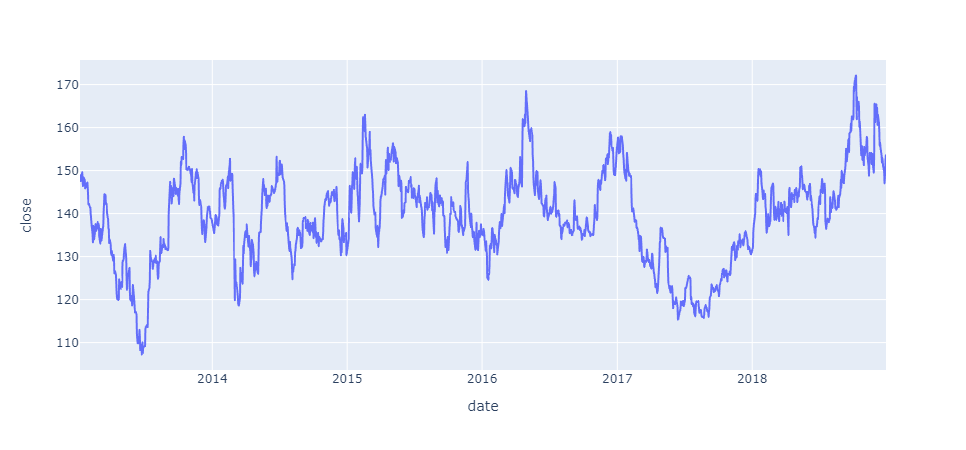

In [27]:
fig = px.line(gazp_daily, x=gazp_daily.index, y=gazp_daily.close)
fig.show()

In [46]:
from ta.trend import MACD  # Импортируем индикатор

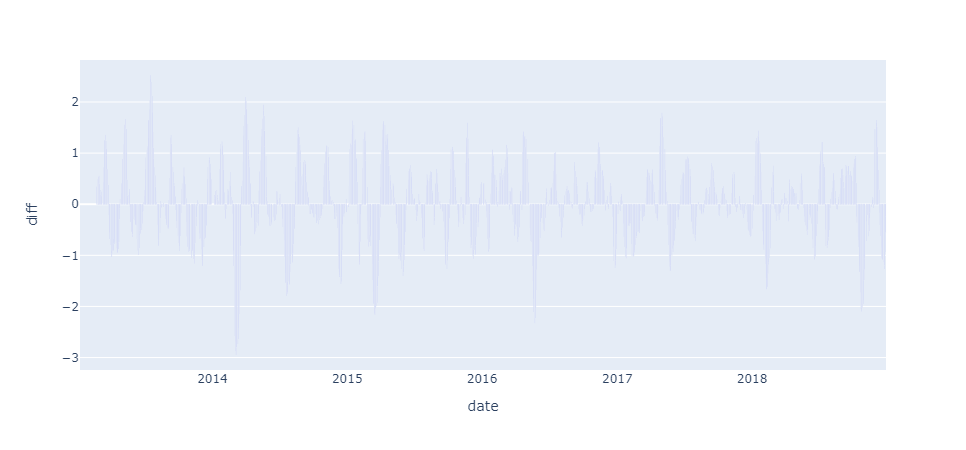

In [47]:
MACD = MACD(gazp_daily.close)
MACD_result = pd.DataFrame({'macd': MACD.macd(),
                            'diff': MACD.macd_diff(),
                            'signal': MACD.macd_signal()})

fig = px.bar(MACD_result, x=MACD_result.index, y=MACD_result['diff'])
fig.show()